# Image Classification with Keras

We will take a pre-trained deep neural network classifier, set to classify 1,000 images and experiment with feeding it a few images of our own. 

The main packages here are Keras with a tensorflow backend. 

Tensorflow is an extremely popular open source library for deep learning developed by Google. Keras provides an accessible user friendly wrapper around tensorflow to save us from getting too deep into carefully specifying the model. The model we are utilising here is a really deep neural network that took weeks to run on really good hardware.

The data is pre-trained on the imagenet website which classifies millions of images into thousands of categories, **http://image-net.org/**

Code is implemented in Python 2.7.

It is also necessary to clone this ** https://github.com/fchollet/deep-learning-models **

### Import packages

In [1]:
# import the necessary packages
from keras.preprocessing import image as image_utils
from imagenet_utils import decode_predictions
from imagenet_utils import preprocess_input
from vgg16 import VGG16
import numpy as np
import argparse
from IPython.display import Image, display
import pandas as pd

Using TensorFlow backend.


### Fuction to generate predictions and plot

In [2]:
def Generate_scores(img):    
        
    print("[INFO] loading and preprocessing image...")
    image = image_utils.load_img(img, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    
    print("[INFO] loading network...")
    model = VGG16(weights="imagenet")
    
    print("[INFO] classifying image...")
    preds = model.predict(image)

    (__, inID, label) = decode_predictions(preds)[0][0]
    
    result=decode_predictions(preds, top=10)[0]
    
    display(Image(img))
    
    result_frame=pd.DataFrame(result).ix[:,1:]
    result_frame.columns=["item", "probability"]
    result_frame.index=result_frame.index +1
    #display(result_frame)

    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure(figsize=(10,7))
    sns.set_style('white')
    sns.set_context('talk',font_scale=1.8)
    sns.set_color_codes("pastel")
    ax=sns.barplot(x='probability',y='item',data=result_frame,color="b", palette="Blues_r")
    sns.plt.title('What is it?')
    ax.set(xlim=(0, 1))
    ax.set(xlabel='Probability', ylabel='Object')
        
    

### Leopard

Lets start simple!

[INFO] loading and preprocessing image...
[INFO] loading network...
[INFO] classifying image...


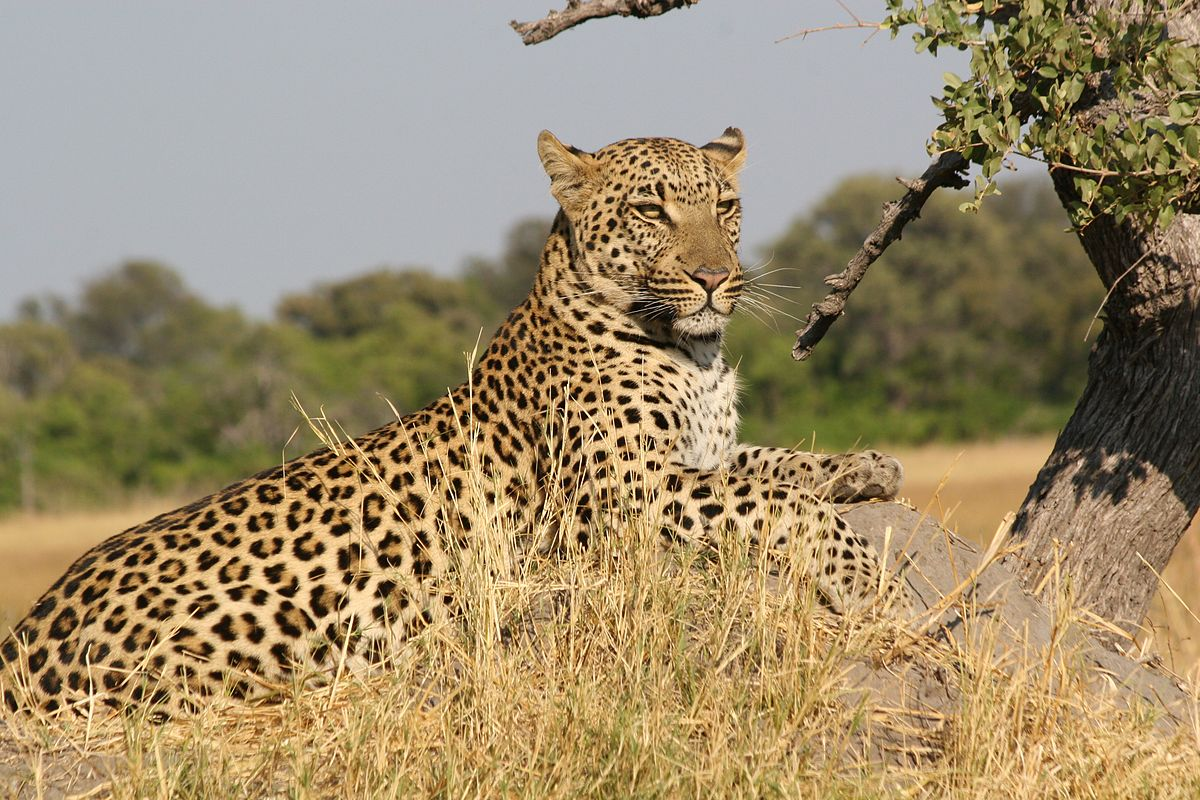

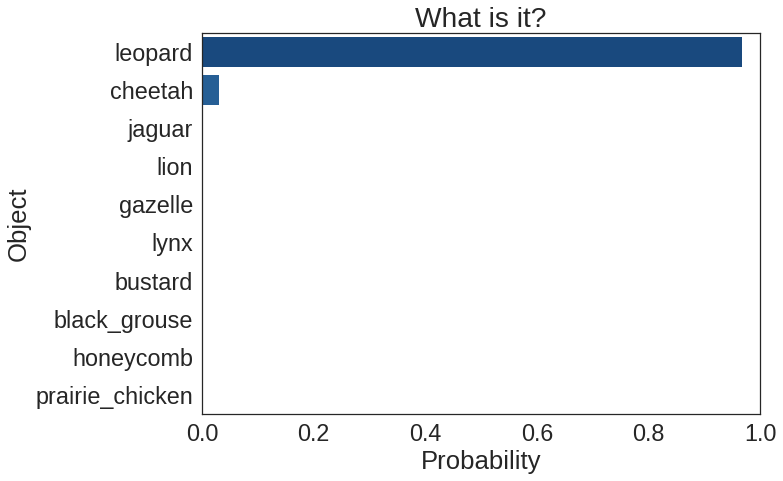

In [3]:
Generate_scores("leopard.jpg")

Not bad. Okay lets try another easy one!

[INFO] loading and preprocessing image...
[INFO] loading network...
[INFO] classifying image...


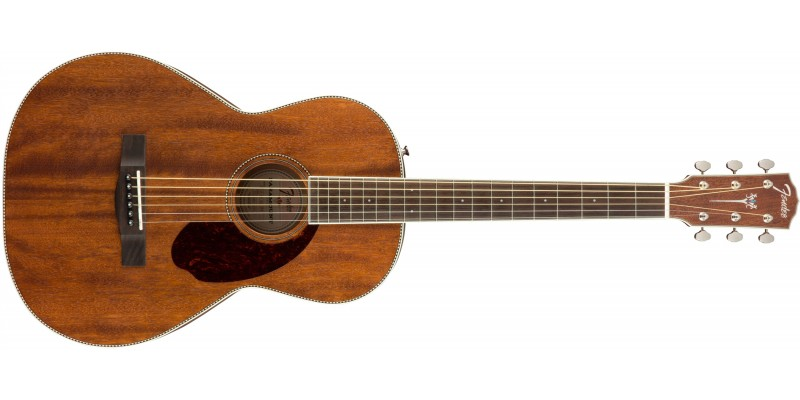

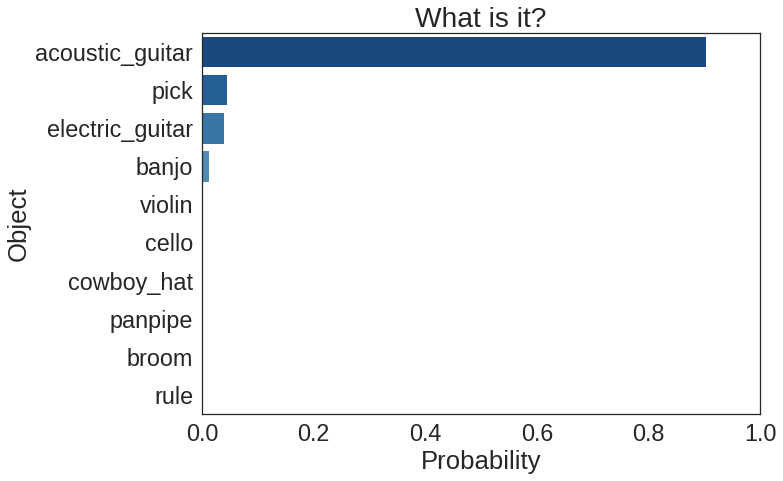

In [4]:
Generate_scores("guitar.jpg")

Okay lets make this a bit harder now. Lets try something a little bit removed...

[INFO] loading and preprocessing image...
[INFO] loading network...
[INFO] classifying image...


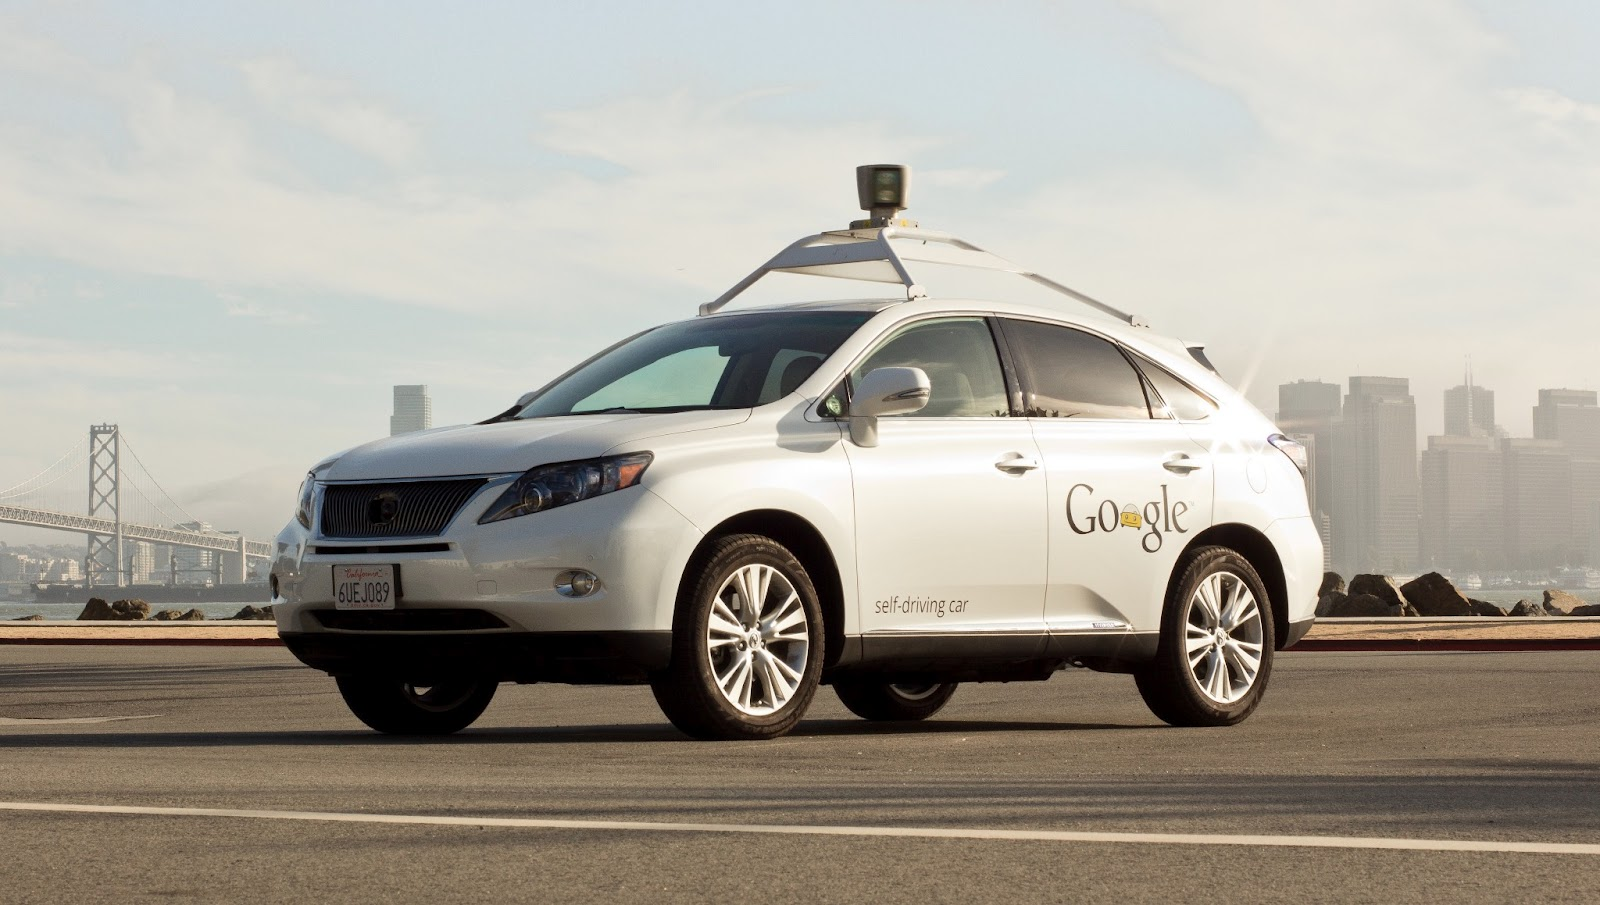

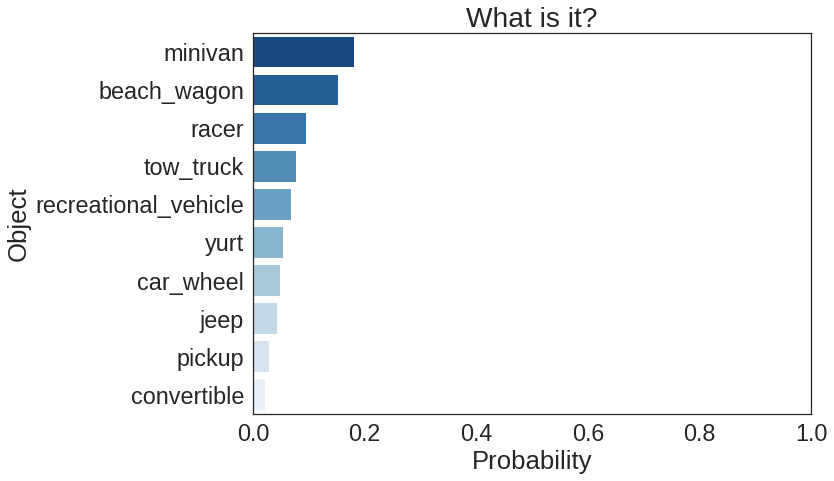

In [5]:
Generate_scores("self_drive_car.jpg")

Here is one that a human and computer might see differently.

[INFO] loading and preprocessing image...
[INFO] loading network...
[INFO] classifying image...


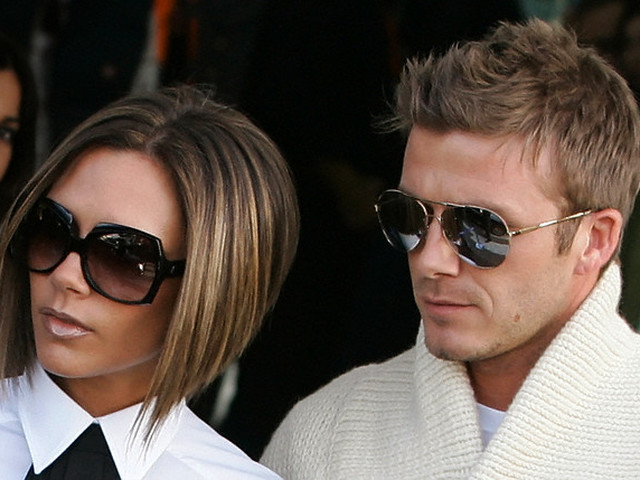

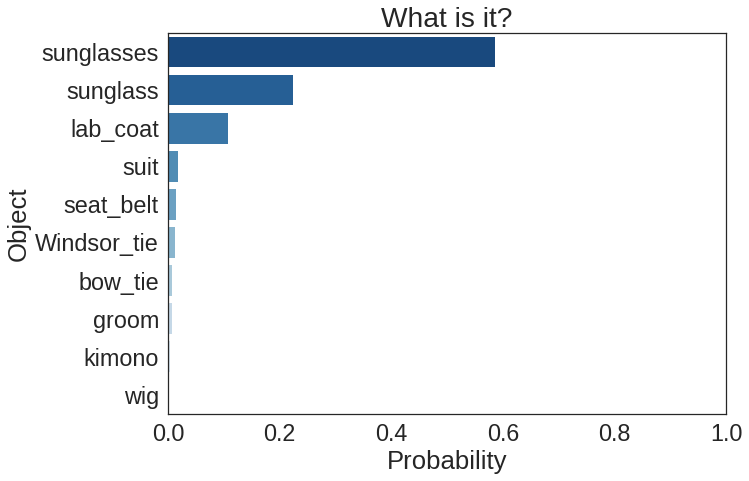

In [6]:
Generate_scores("posh_and_becks.jpg")

and lets see how it copes with several things at once...

[INFO] loading and preprocessing image...
[INFO] loading network...
[INFO] classifying image...


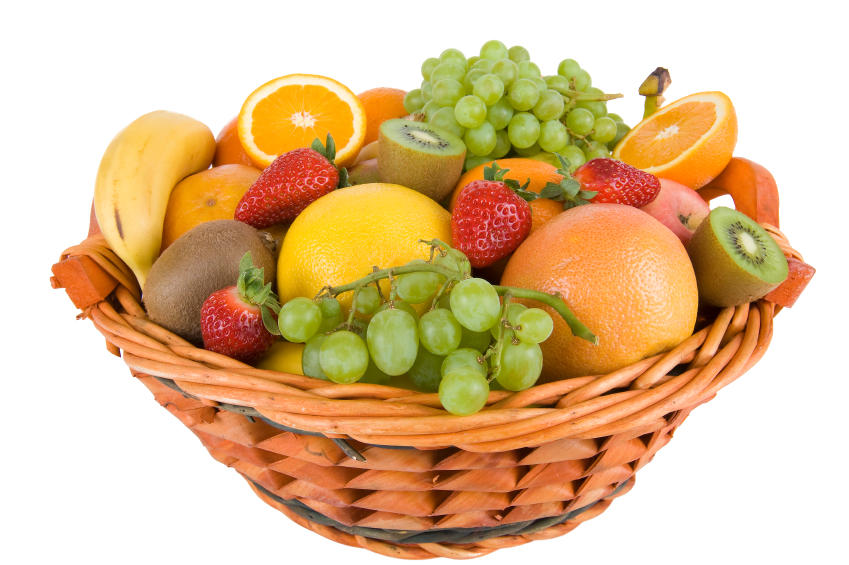

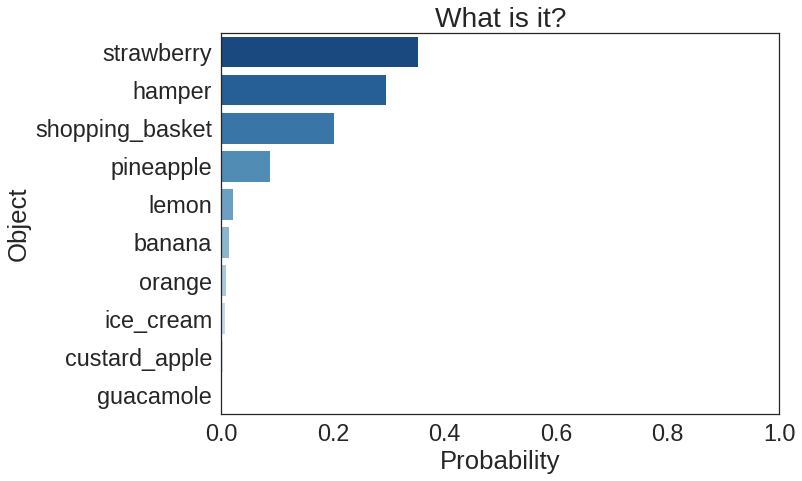

In [7]:
Generate_scores("fruit.jpg")

## ...and finally

In [ ]:
Generate_scores("Kevin.jpg")

## Credit

These excellent tutorials were extremely useful in pulling this Notebook together.

** http://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/ **

** https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/07_Inception_Model.ipynb **